创建演示数据：

In [1]:
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(n_features = 2, n_informative = 2, n_redundant = 0, n_samples = 1000, n_classes = 3, n_clusters_per_class = 1, random_state = 0)

演示数据：

<IPython.core.display.Javascript object>


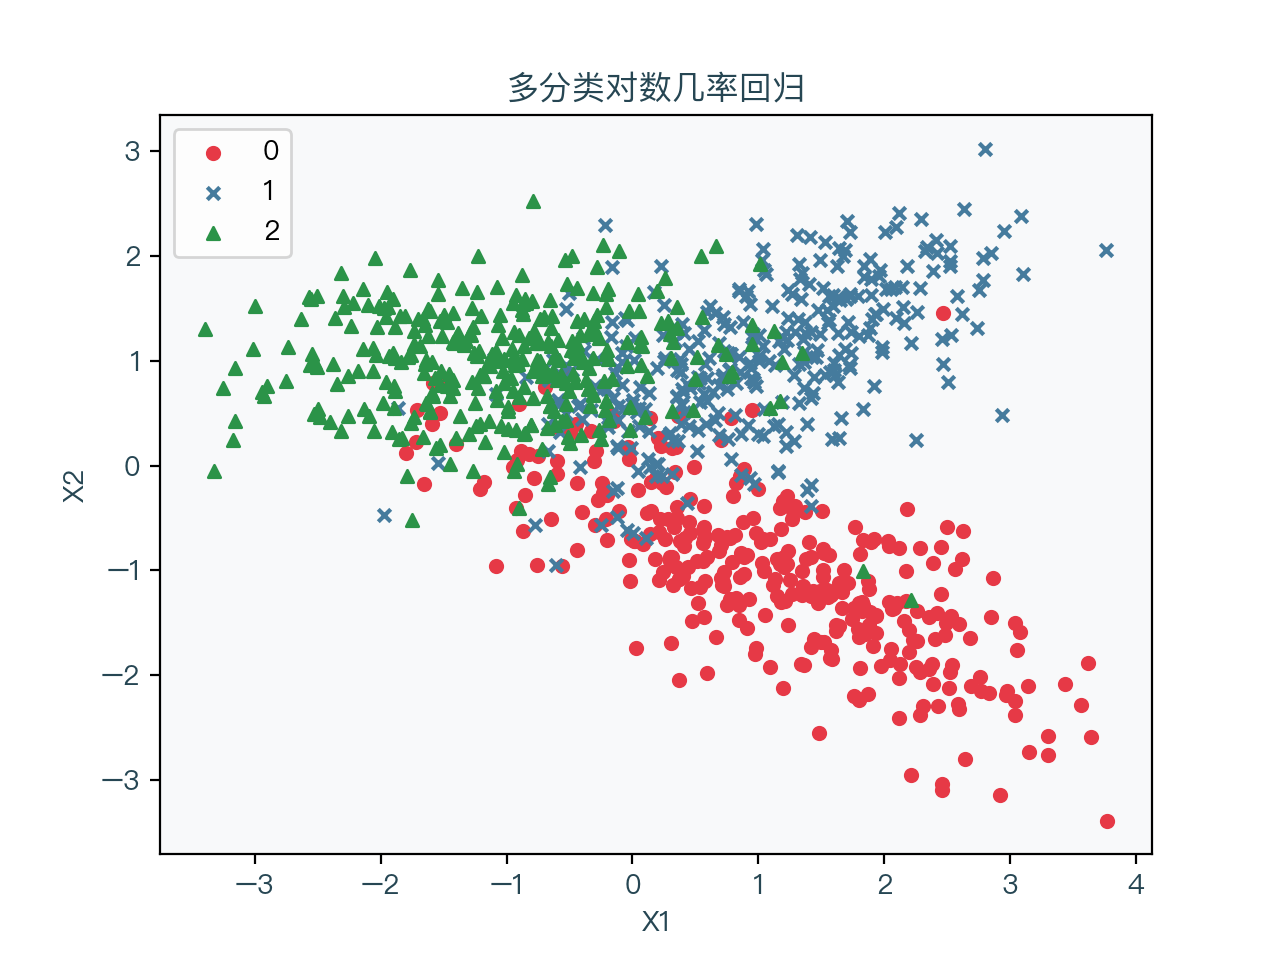

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体
fig, ax = plt.subplots()
ax.set_facecolor('#f8f9fa')

x1 = X[y==0][:, 0]
y1 = X[y==0][:, 1]
x2 = X[y==1][:, 0]
y2 = X[y==1][:, 1]
x3 = X[y==2][:, 0]
y3 = X[y==2][:, 1]
p1 = plt.scatter(x1, y1, c='#e63946', marker='o', s=20)
p2 = plt.scatter(x2, y2, c='#457b9d', marker='x', s=20)
p3 = plt.scatter(x3, y3, c='#2b9348', marker='^', s=20)

ax.set_title('多分类对数几率回归', color='#264653')
ax.set_xlabel('X1', color='#264653')
ax.set_ylabel('X2', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.legend([p1, p2, p3], ["0", "1", "2"], loc="upper left")
plt.show()

拟合演示数据：

In [3]:
from sklearn.linear_model import LogisticRegression

# 初始化多分类对数几率回归器，无正则化
reg = LogisticRegression(penalty="none", multi_class="multinomial")
# 拟合线性模型
reg.fit(X, y)
# 权重系数
W = reg.coef_
# 截距
b = reg.intercept_
print("W", W, "b", b)

W [[ 0.28220624 -2.81854556]
 [ 0.98990534  0.90779231]
 [-1.27211158  1.91075326]] b [ 0.68142197  0.21108841 -0.89251037]


可视化：

<IPython.core.display.Javascript object>


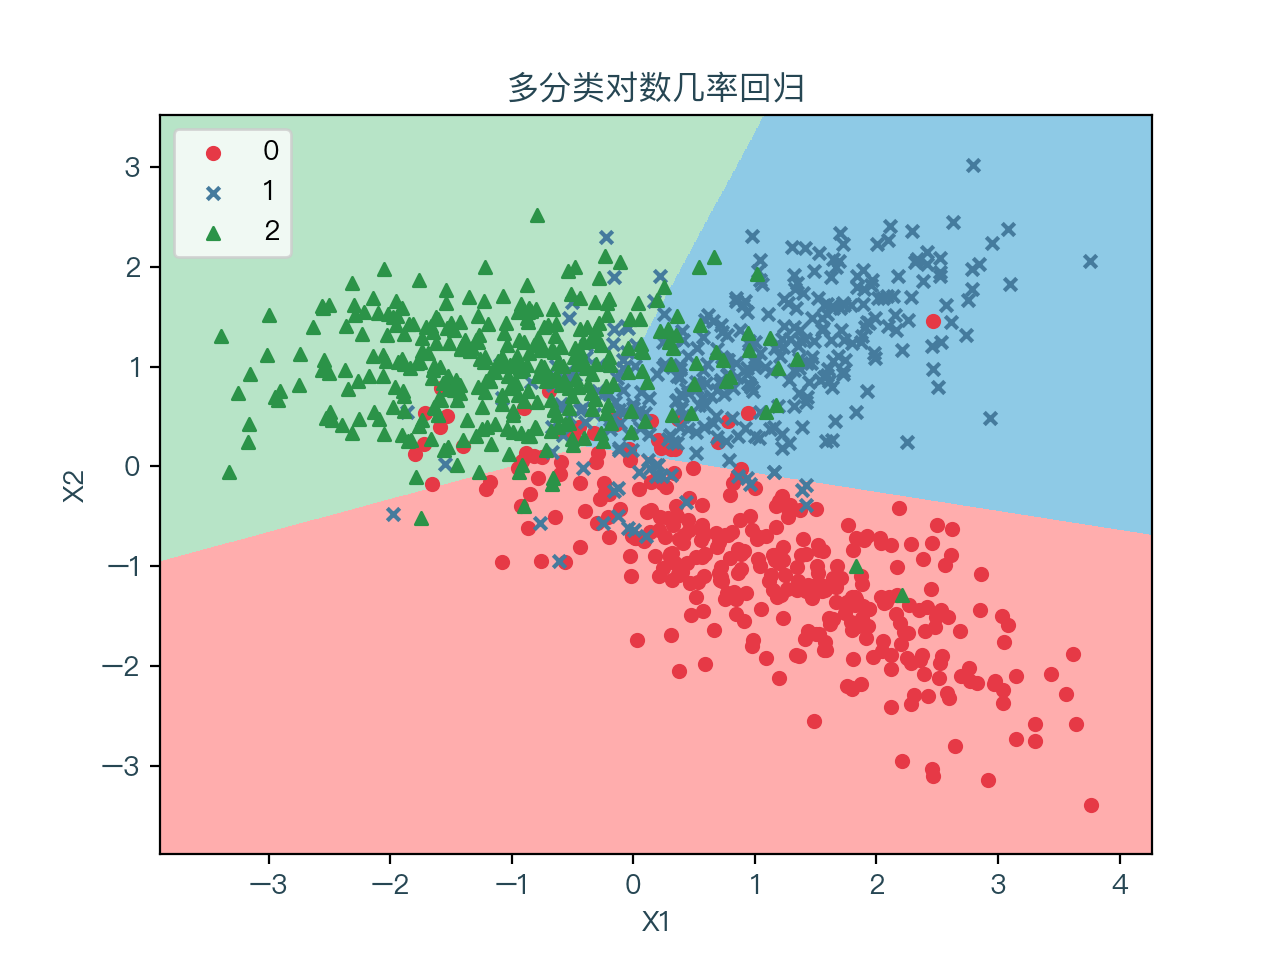

/Users/saisimon/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

%matplotlib notebook

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体
fig, ax = plt.subplots()
ax.set_facecolor('#f8f9fa')

clist=['#8ecae6', '#ffadad']
newcmp = LinearSegmentedColormap.from_list('point_color', clist)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))
Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
clist=['#ffadad', '#8ecae6', "#b7e4c7"]
newcmp = LinearSegmentedColormap.from_list('point_color', clist)
plt.pcolormesh(xx, yy, Z, cmap = newcmp)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

x1 = X[y==0][:, 0]
y1 = X[y==0][:, 1]
x2 = X[y==1][:, 0]
y2 = X[y==1][:, 1]
x3 = X[y==2][:, 0]
y3 = X[y==2][:, 1]
p1 = plt.scatter(x1, y1, c='#e63946', marker='o', s=20)
p2 = plt.scatter(x2, y2, c='#457b9d', marker='x', s=20)
p3 = plt.scatter(x3, y3, c='#2b9348', marker='^', s=20)

ax.set_title('多分类对数几率回归', color='#264653')
ax.set_xlabel('X1', color='#264653')
ax.set_ylabel('X2', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.legend([p1, p2, p3], ["0", "1", "2"], loc="upper left")
plt.show()

多分类对数几率回归，使用梯度下降法（gradient descent）：

In [5]:
import numpy as np

def dcost(X, y, W):
    """
    多分类对数几率回归的代价函数的梯度
    args:
        X - 训练数据集
        y - 目标标签值
        W - 权重系数
    return:
        代价函数的梯度
    """
    ds = np.zeros(W.shape)
    for i in range(X.shape[0]):
        c = np.sum(np.exp(W.dot(X[i])))
        for j in range(W.shape[1]):
            a = 0
            if j == y[i]:
                a = 1
            b = np.exp(W[j].dot(X[i]))
            ds[j] = ds[j] - X[i] * (a - b / c)
    return ds

def direction(d):
    """
    更新的方向
    args:
        d - 梯度
    return:
        更新的方向
    """
    return -d

def multinomialLogisticRegressionGd(X, y, max_iter=1000, tol=1e-4, step=1e-3):
    """
    多分类对数几率回归，使用梯度下降法（gradient descent）
    args:
        X - 训练数据集
        y - 目标标签值
        max_iter - 最大迭代次数
        tol - 变化量容忍值
        step - 步长
    return:
        W - 权重系数
    """
    y_classes = np.unique(y)
    # 初始化 W 为零向量
    W = np.zeros((len(y_classes), X.shape[1]))
    # 开始迭代
    for it in range(max_iter):
        # 计算梯度
        d = dcost(X, y, W)
        # 当梯度足够小时，结束迭代
        if np.linalg.norm(x=d, ord=1) <= tol:
            break
        p = direction(d)
        # 更新权重系数 W
        W = W + step * p
    return W

拟合演示数据：

In [6]:
import numpy as np

X_b = np.c_[np.ones((X.shape[0], 1)), X]
W = multinomialLogisticRegressionGd(X_b, y, step=5e-3)
print(W)

[[ 0.68142004  0.28220722 -2.81854187]
 [ 0.21108736  0.98990255  0.90779163]
 [-0.8925074  -1.27210977  1.91075024]]


多分类对数几率回归假设函数：

In [7]:
import numpy as np

def hypothesis(X, W):
    """
    多分类对数几率回归的假设函数
    args:
        X - 训练数据集
        W - 权重系数
    return:
        预测值
    """
    return np.argmax(np.exp(X.dot(W.T)), axis=1)

可视化：

<IPython.core.display.Javascript object>


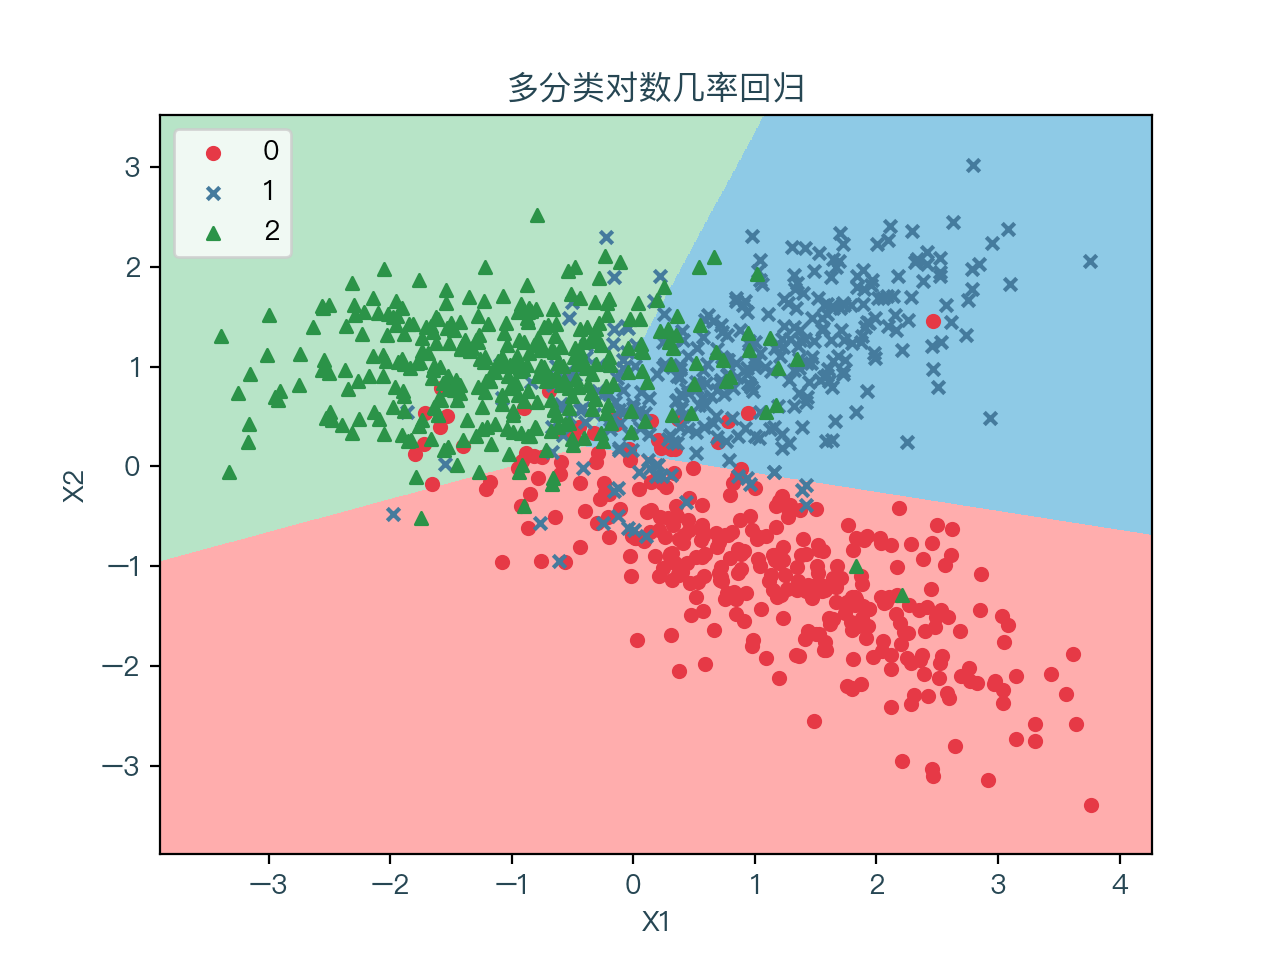

/Users/saisimon/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

%matplotlib notebook

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体
fig, ax = plt.subplots()
ax.set_facecolor('#f8f9fa')

clist=['#8ecae6', '#ffadad']
newcmp = LinearSegmentedColormap.from_list('point_color', clist)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))
Z = hypothesis(np.c_[np.ones((xx.shape[0] * xx.shape[1], 1)), xx.ravel(), yy.ravel()], W)
Z = Z.reshape(xx.shape)
clist=['#ffadad', '#8ecae6', "#b7e4c7"]
newcmp = LinearSegmentedColormap.from_list('point_color', clist)
plt.pcolormesh(xx, yy, Z, cmap = newcmp)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

x1 = X[y==0][:, 0]
y1 = X[y==0][:, 1]
x2 = X[y==1][:, 0]
y2 = X[y==1][:, 1]
x3 = X[y==2][:, 0]
y3 = X[y==2][:, 1]
p1 = plt.scatter(x1, y1, c='#e63946', marker='o', s=20)
p2 = plt.scatter(x2, y2, c='#457b9d', marker='x', s=20)
p3 = plt.scatter(x3, y3, c='#2b9348', marker='^', s=20)

ax.set_title('多分类对数几率回归', color='#264653')
ax.set_xlabel('X1', color='#264653')
ax.set_ylabel('X2', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.legend([p1, p2, p3], ["0", "1", "2"], loc="upper left")
plt.show()